In [1]:
from src.models.decisiontrees.xgboost import XGB1
from src.models.decisiontrees.catboost import CatBoost1
from src.models.decisiontrees.lightgbm import LGBM1
from utils import get_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
len_week =24*7

In [ ]:
X,y,times = get_data('ES',indices=[114],demand=[0]+[i for i in range(1,8000,6)]+[i for i in range(6300,6400 )]+[i for i in range(8700,8800)],temp=[0, 1, 24, 24*7, 24*365],spv=[0, 1, 24, 24*7, 24*365],rollout_values=[-i for i in range(25)],n_futures=24*31)

/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[col_name] = new_df[base_col].shift(lag)
/Users/carloteufel/Documents/Projects/Datathon2025/ETH_Datathon_2025/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [4]:
times

[8799    2023-01-02 16:00:00
 8800    2023-01-02 17:00:00
 8801    2023-01-02 18:00:00
 8802    2023-01-02 19:00:00
 8803    2023-01-02 20:00:00
                 ...        
 22594   2024-07-30 13:00:00
 22595   2024-07-30 14:00:00
 22596   2024-07-30 15:00:00
 22597   2024-07-30 16:00:00
 22598   2024-07-30 17:00:00
 Name: DATETIME, Length: 13800, dtype: datetime64[ns]]

In [5]:
X_train = X[0][:-800]
y_train = y[0][:-800]
X_test = X[0][-800:]
y_test = y[0][-800:]
times_train = times[0][:-800]
times_test = times[0][-800:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(times_train.shape)
print(times_test.shape)

(13000, 1557)
(13000, 31)
(800, 1557)
(800, 31)
(13000,)
(800,)


In [ ]:
model = XGB1()
model2 = CatBoost1(loss_function='MultiRMSE',task_type='GPU', devices='0:1:2:3')
model3 = LGBM1()

In [7]:
# model.fit(X_train, y_train)
# model3.fit(X_train, y_train)
model2.fit(X_train, y_train)


0:	learn: 8.4896844	total: 1.14s	remaining: 18m 58s
1:	learn: 8.3243133	total: 2.13s	remaining: 17m 41s
2:	learn: 8.1666514	total: 3.12s	remaining: 17m 18s
3:	learn: 8.0111887	total: 4.15s	remaining: 17m 14s
4:	learn: 7.8633611	total: 5.08s	remaining: 16m 51s
5:	learn: 7.7172918	total: 5.97s	remaining: 16m 28s
6:	learn: 7.5752102	total: 6.92s	remaining: 16m 21s
7:	learn: 7.4361719	total: 7.85s	remaining: 16m 13s
8:	learn: 7.2986593	total: 8.74s	remaining: 16m 2s
9:	learn: 7.1727738	total: 9.67s	remaining: 15m 57s
10:	learn: 7.0479865	total: 10.6s	remaining: 15m 54s
11:	learn: 6.9234542	total: 11.6s	remaining: 15m 53s
12:	learn: 6.8056954	total: 12.6s	remaining: 15m 53s
13:	learn: 6.6920875	total: 13.6s	remaining: 15m 54s
14:	learn: 6.5868002	total: 14.5s	remaining: 15m 53s
15:	learn: 6.4820452	total: 15.5s	remaining: 15m 51s
16:	learn: 6.3825549	total: 16.4s	remaining: 15m 51s
17:	learn: 6.2823568	total: 17.5s	remaining: 15m 55s
18:	learn: 6.1874049	total: 18.6s	remaining: 15m 58s
19:	

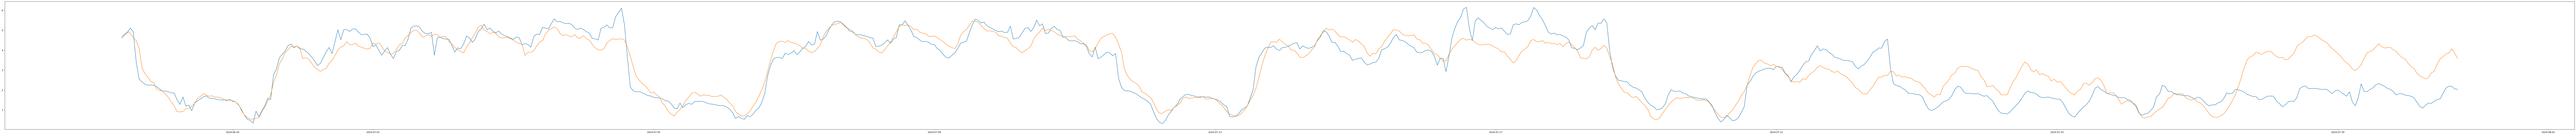

In [8]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,-1], label='Real')
plt.plot(times_test, model2.predict(X_test)[:,-1], label='CatBoost')

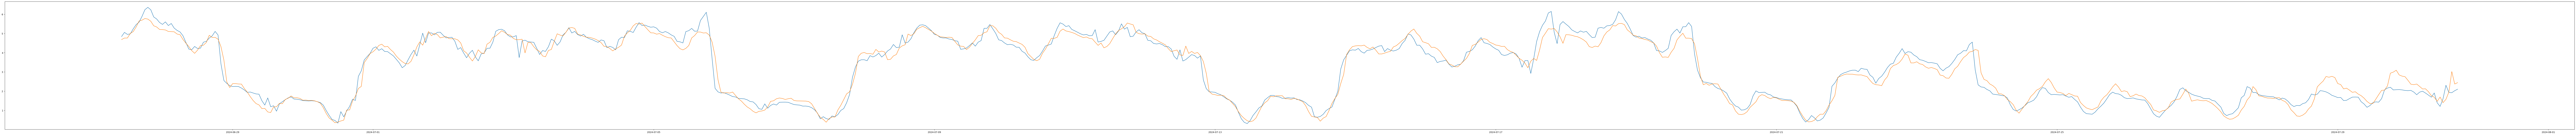

In [9]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,1],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,1], label='CatBoost')

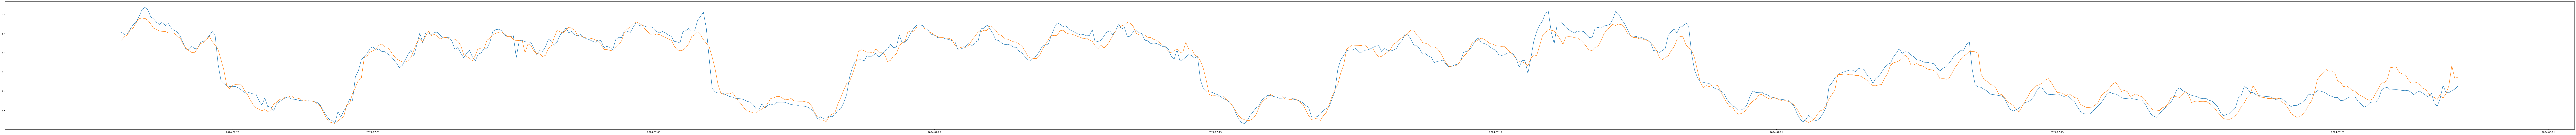

In [10]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,2],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,2], label='CatBoost')

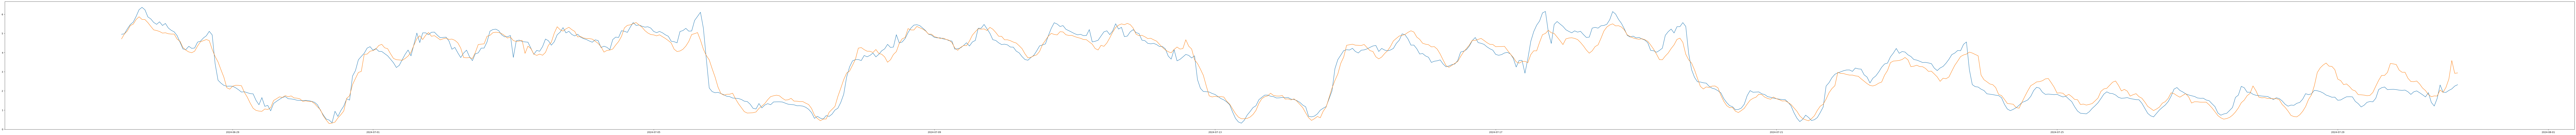

In [11]:
plt.figure(figsize=(200, 10)) 
plt.plot(times_test, y_test[:,3],label='Real')
plt.plot(times_test,model2.predict(X_test)[:,3], label='CatBoost')

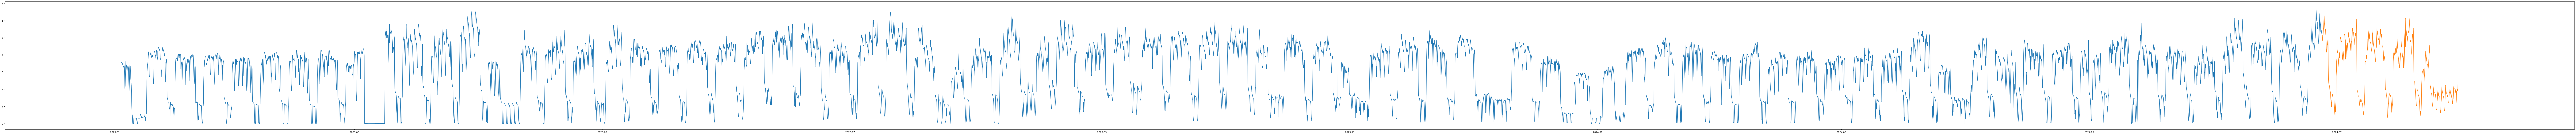

In [12]:
plt.figure(figsize=(200, 10))
plt.plot(times_train, y_train[:,0], label='Real')
plt.plot(times_test, y_test[:,0], label='CatBoost')